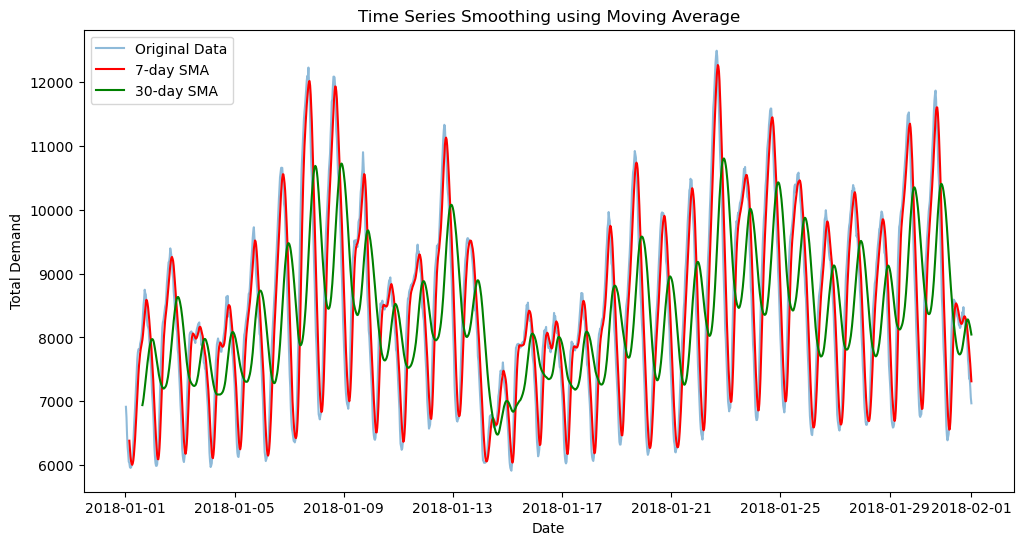

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Ensure the date column is parsed correctly)
df = pd.read_csv("C:/Users/admin/Downloads/PRICE_AND_DEMAND_201801_NSW1.csv", parse_dates=["SETTLEMENTDATE"])
df.set_index("SETTLEMENTDATE", inplace=True)

# Ensure 'TOTALDEMAND' is numeric
df["TOTALDEMAND"] = pd.to_numeric(df["TOTALDEMAND"], errors="coerce")

# Drop any NaN values
df.dropna(inplace=True)

# Apply Moving Average Smoothing (SMA) - 7-day window
df["SMA_7"] = df["TOTALDEMAND"].rolling(window=7).mean()

# Apply Moving Average Smoothing (SMA) - 30-day window (for long-term trend)
df["SMA_30"] = df["TOTALDEMAND"].rolling(window=30).mean()

# Plot original data and moving averages
plt.figure(figsize=(12, 6))
plt.plot(df["TOTALDEMAND"], label="Original Data", alpha=0.5)
plt.plot(df["SMA_7"], label="7-day SMA", color="red")
plt.plot(df["SMA_30"], label="30-day SMA", color="green")
plt.legend()
plt.title("Time Series Smoothing using Moving Average")
plt.xlabel("Date")
plt.ylabel("Total Demand")
plt.show()
